In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import spearmanr

In [68]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

In [2]:
df_ege_raw = pd.read_excel("БаллЗачисл2023.xlsx", usecols=['L_ID', 'Гражд','Группа', 'Сумма баллов', 'Б.1.И', 'Б.1.Д', 'Б.1', 'Б.2.И', 'Б.2', 'Б.3.Д', 'Б.3.И', 'Б.3',	'ИД'], index_col=0)

In [3]:
df_test_raw = pd.read_excel("ВТ 2023.xlsx", usecols=['ID', 'Результат ', 'Математика', 'Физика', 'Химия', 'Информатика'], index_col=0)

In [4]:
df_ege = df_ege_raw[df_ege_raw['Сумма баллов'] != 'н/с']
df_ege = df_ege[df_ege_raw['Сумма баллов'] != 'н/р']

C:\Users\seismopro\AppData\Local\Temp\ipykernel_5740\3664336429.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ege = df_ege[df_ege_raw['Сумма баллов'] != 'н/р']


In [5]:
df_test = df_test_raw[df_test_raw['Результат '] != '-']
df_test = df_test[~df_test.index.duplicated(keep='first')]

In [6]:
df_ege_test = df_ege.join(df_test)

In [7]:
df_ege_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1915 entries, 59086 to 656177
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Гражд         1915 non-null   object 
 1   Группа        1915 non-null   object 
 2   Сумма баллов  1915 non-null   object 
 3   Б.1.Д         1908 non-null   object 
 4   Б.1.И         1908 non-null   object 
 5   Б.1           1908 non-null   object 
 6   Б.2.И         1908 non-null   object 
 7   Б.2           1908 non-null   object 
 8   Б.3.Д         1908 non-null   object 
 9   Б.3.И         1908 non-null   object 
 10  Б.3           1908 non-null   float64
 11  ИД            752 non-null    float64
 12  Результат     1395 non-null   object 
 13  Математика    1395 non-null   object 
 14  Физика        1395 non-null   object 
 15  Химия         1395 non-null   object 
 16  Информатика   1395 non-null   object 
dtypes: float64(2), object(15)
memory usage: 333.8+ KB


In [98]:
df_ege_test

,Гражд,Группа,Баллы ЕГЭ,Б.1.Д,Б.1.И,Б.1,Б.2.И,Б.2,Б.3.Д,Б.3.И,Б.3,ИД,Баллы входного тестирования,Математика,Физика,Химия,Информатика
L_ID,,,,,,,,,,,,,,,,,
109966,RU,8К33,249,ИиИ,ЕГЭ,88,ЕГЭ,74,РЯ,ЕГЭ,77.0,10.0,17,9,8,0,0
121388,RU,8И32,186,ИиИ,ЕГЭ,62,ЕГЭ,52,РЯ,ЕГЭ,72.0,NaN,9,6,2.333333,0,0
133491,RU,2Д32,215,Х,ЕГЭ,88,ЕГЭ,64,РЯ,ЕГЭ,63.0,0.0,22,5,4.333333,6.5,5.25
134707,RU,8И32,207,ИиИ,ЕГЭ,80,ЕГЭ,58,РЯ,ЕГЭ,69.0,NaN,7,4,2.5,0,0
135676,RU,0А31,223,Ф,ЕГЭ,66,ЕГЭ,68,РЯ,ЕГЭ,79.0,10.0,27,7,9,4.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655438,RU,0В32,227,М,ЕГЭ,68,ЕГЭ,88,РЯ,ЕГЭ,71.0,NaN,9,6,2.666667,0,0
655721,RU,1В31,165,ИиИ,ЕГЭ,53,ЕГЭ,50,РЯ,ЕГЭ,62.0,NaN,13,7,2,4,0
656091,TJ,4Б32,158,Ф,ВИ,47,ВИ,60,РЯ,ВИ,51.0,NaN,8,1,2.833333,2,1.583333


In [8]:
df_ege_test = df_ege_test[df_ege_test['Результат '].notna()]

In [9]:
df_ege_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 109966 to 656152
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Гражд         1395 non-null   object 
 1   Группа        1395 non-null   object 
 2   Сумма баллов  1395 non-null   object 
 3   Б.1.Д         1391 non-null   object 
 4   Б.1.И         1391 non-null   object 
 5   Б.1           1391 non-null   object 
 6   Б.2.И         1391 non-null   object 
 7   Б.2           1391 non-null   object 
 8   Б.3.Д         1391 non-null   object 
 9   Б.3.И         1391 non-null   object 
 10  Б.3           1391 non-null   float64
 11  ИД            637 non-null    float64
 12  Результат     1395 non-null   object 
 13  Математика    1395 non-null   object 
 14  Физика        1395 non-null   object 
 15  Химия         1395 non-null   object 
 16  Информатика   1395 non-null   object 
dtypes: float64(2), object(15)
memory usage: 196.2+ KB


In [12]:
df_ege_test.to_excel('test.xlsx')

In [16]:
df_ege_test['Сумма баллов'] = df_ege_test['Сумма баллов'].astype(str).astype(int)
df_ege_test['Результат '] = df_ege_test['Результат '].astype(str).astype(int)

In [17]:
df_ege_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 109966 to 656152
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Гражд         1395 non-null   object 
 1   Группа        1395 non-null   object 
 2   Сумма баллов  1395 non-null   int32  
 3   Б.1.Д         1391 non-null   object 
 4   Б.1.И         1391 non-null   object 
 5   Б.1           1391 non-null   object 
 6   Б.2.И         1391 non-null   object 
 7   Б.2           1391 non-null   object 
 8   Б.3.Д         1391 non-null   object 
 9   Б.3.И         1391 non-null   object 
 10  Б.3           1391 non-null   float64
 11  ИД            637 non-null    float64
 12  Результат     1395 non-null   int32  
 13  Математика    1395 non-null   object 
 14  Физика        1395 non-null   object 
 15  Химия         1395 non-null   object 
 16  Информатика   1395 non-null   object 
dtypes: float64(2), int32(2), object(13)
memory usage: 185.3+ KB


In [83]:
df_ege_test = df_ege_test.rename(columns={"Сумма баллов": "Баллы ЕГЭ", "Результат ": "Баллы входного тестирования"})

In [97]:
'''ax1 = df_ege_test.plot.scatter(x='Баллы ЕГЭ',
                      y='Баллы входного тестирования',
                      c='DarkBlue')'''

"ax1 = df_ege_test.plot.scatter(x='Баллы ЕГЭ',\n                      y='Баллы входного тестирования',\n                      c='DarkBlue')"

In [87]:
c = np.corrcoef(df_ege_test['Баллы ЕГЭ'],df_ege_test['Баллы входного тестирования'])
c

array([[1.       , 0.2608778],
       [0.2608778, 1.       ]])

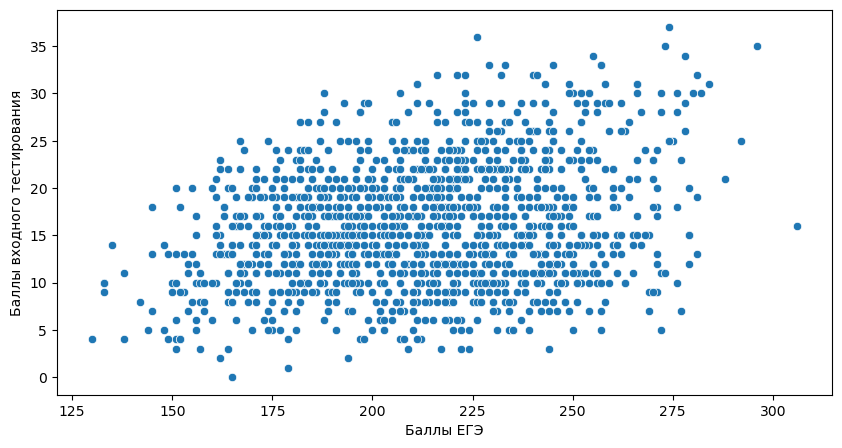

In [88]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=df_ege_test, x='Баллы ЕГЭ', y='Баллы входного тестирования')
plt.show()

c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


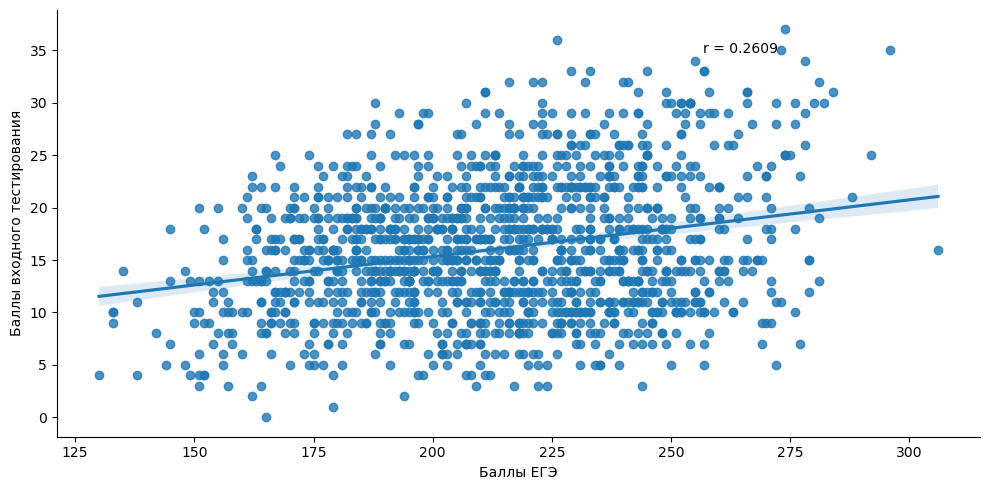

In [89]:
#plt.figure(figsize = (20,5))
g = sns.lmplot(data=df_ege_test, x='Баллы ЕГЭ', y='Баллы входного тестирования', aspect=2, sharey=False, sharex=False)
r, p = stats.pearsonr(df_ege_test['Баллы ЕГЭ'], df_ege_test['Баллы входного тестирования'])
plt.annotate('r = {:.4f}'.format(r), xy=(0.7, 0.9), xycoords='axes fraction')
plt.show()

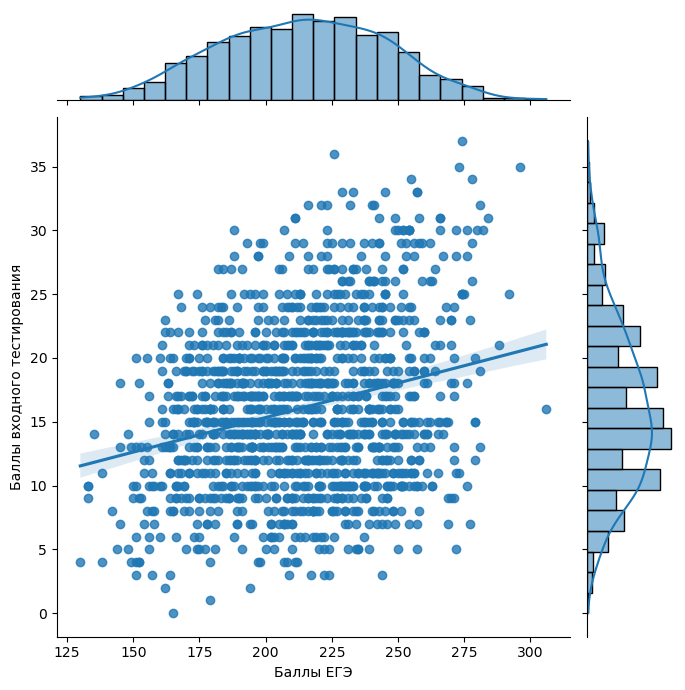

In [93]:
sns.jointplot(data=df_ege_test, x='Баллы ЕГЭ', y='Баллы входного тестирования', kind="reg", height=7)
plt.show()

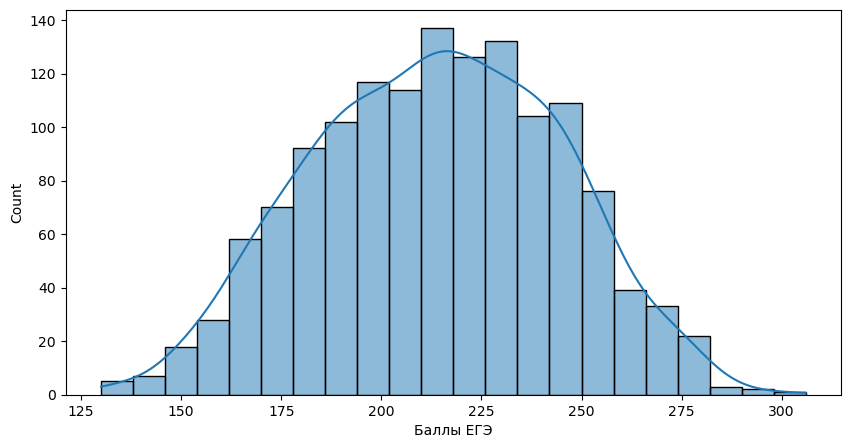

In [94]:
plt.figure(figsize = (10,5))
sns.histplot(data=df_ege_test, x="Баллы ЕГЭ", kde=True)
plt.show()

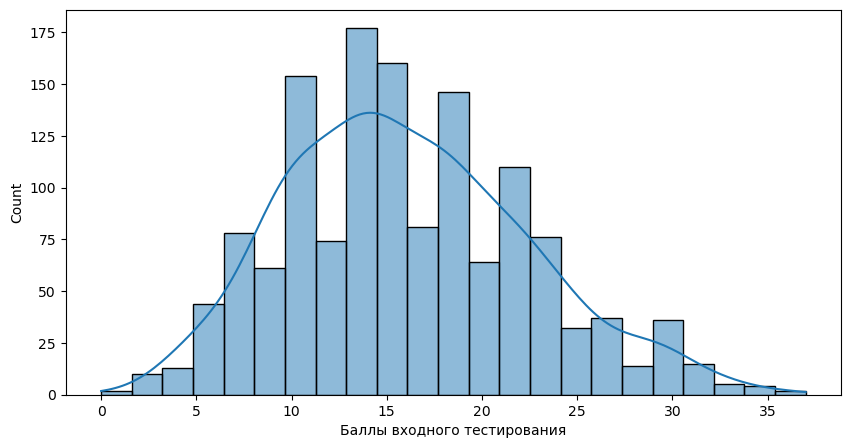

In [95]:
plt.figure(figsize = (10,5))
sns.histplot(data=df_ege_test, x="Баллы входного тестирования", kde=True)
plt.show()

<Axes: >

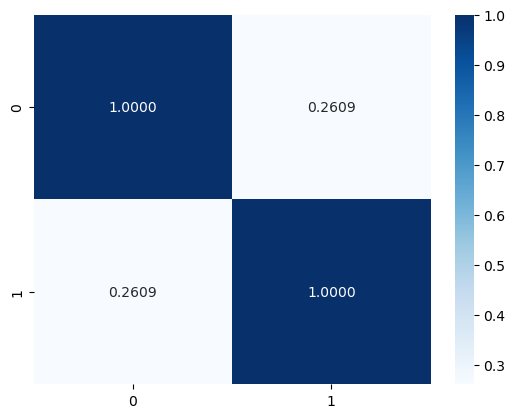

In [96]:
#plt.figure(figsize = (10, 10))
sns.heatmap(c, cmap="Blues", annot=True, fmt=".4f") 